In [1]:
import os
import re
import numpy as np

import matplotlib.pyplot as plt
from pylab import *

In [2]:
from pythonlib import boolean as boolean
from pythonlib import boolean_net as boolean_net

In [3]:
import random as random #random could be destroyed by matplotlib

In [4]:
def to_bool_charactor(c):
    if c=='1':
        return True
    else:
        return False

In [5]:
def to_bool_string(s):
    return[to_bool_charactor(x) for x in s]

In [6]:
def file2matrix(path):
    fp=open(path,'r')
    content=fp.read()
    rowlist=content.splitlines()
    x=np.array([to_bool_string(x) for x in rowlist])
    
    return x
    

In [7]:
num_bool_dict={0:[False,False,False,False],
              1:[False,False,False,True],
              2:[False,False,True,False],
              3:[False,False,True,True],
              4:[False,True,False,False],
              5:[False,True,False,True],
              6:[False,True,True,False],
              7:[False,True,True,True],
              8:[True,False,False,False],
              9:[True,False,False,True]}
             


In [8]:
bool_list=list(num_bool_dict.values())

In [9]:
def to_char_bool(bool):
    if bool:
        return '1'
    else:
        return '0'

def to_string_boollist(boollist):
    temp=[to_char_bool(x) for x in boollist]    
    return ''.join(temp)

In [10]:
def show_nn(bl1):
    fig,axs=plt.subplots(nrows=1, ncols=5, figsize=(12, 6))
    axs[0].imshow(np.array([bl1.inode]),vmin=0,vmax=1)
    axs[0].set_title('inode')
    axs[0].set_axis_off()
    axs[1].imshow(bl1.wi,vmin=0,vmax=1)
    axs[1].set_title('wi')
    axs[1].set_axis_off()
    axs[2].imshow(np.array([bl1.hnode]),vmin=0,vmax=1)
    axs[2].set_title('hnode')
    axs[2].set_axis_off()
    axs[3].imshow(bl1.wo,vmin=0,vmax=1)
    axs[3].set_title('wo')
    axs[3].set_axis_off()
    axs[4].imshow(np.array([bl1.onode]),vmin=0,vmax=1)
    axs[4].set_title('onode')
    axs[4].set_axis_off()

In [11]:
def show_nparray(nparray):
    fig,axs=plt.subplots(nrows=1, ncols=1)
    axs.imshow((nparray),vmin=0,vmax=1)
    axs.set_title('array')
    axs.set_axis_off()
def show_nparray_title(nparray,title):
    fig,axs=plt.subplots(nrows=1, ncols=1)
    axs.imshow((nparray),vmin=0,vmax=1)
    axs.set_title(title)
    axs.set_axis_off()

In [12]:
def train_id_blnn(blnn_set,num,inputs,targets):
    blnn_set[num].train(inputs,targets)
    blnn_set[num].feedforward()


In [13]:
def verify(blnn,inputs,targets):
    blnn.inode=inputs
    blnn.feedforward()
    if blnn.onode==targets:
        return True
    else:
        return False

def if_num(flag,num):
    if flag:
        return num
    else:
        pass

num_list=[0,1,2,3,4,5,6,7,8,9]

In [14]:
root = "trainingDigits16x" #数据文件所在路径\n"
pathlist = os.listdir(root) # 获取路径下所有数据文件"

random.shuffle(pathlist)
train_set=[]

for i in range (0,32):
    filepath=root+'\\'+pathlist[i]
    s=pathlist[i]
    n=(re.split('_',s))[0]
    targets=num_bool_dict[int(n)]

    inputs=file2matrix(filepath).flatten().tolist()
    #print(filepath)
    train_set.append([inputs,targets,int(n)])

random.shuffle(pathlist)


In [15]:
verify_set=[]
out_dir ='./newDigits16x/'
pathlist = os.listdir(out_dir)
random.shuffle(pathlist)
for i in range (0,100):
    filepath=out_dir+'\\'+pathlist[i]
    s=pathlist[i]
    n=(re.split('_',s))[0]
    targets=num_bool_dict[int(n)]

    inputs=file2matrix(filepath).flatten().tolist()
    #print(filepath)
    verify_set.append([inputs,targets,int(n)]) 

In [16]:
blnn_set=[]

for i in range(0,10):
    blnntemp=boolean_net.booleannet('bl.db',256,16,4)
    blnn_set.append(blnntemp)

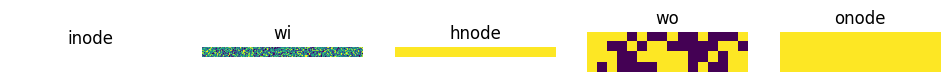

In [17]:
show_nn(blnn_set[0])

In [18]:
#train
random.shuffle(train_set)
for i in train_set:
    inputs,targets,num=i
    train_id_blnn(blnn_set,num,inputs,targets)


    

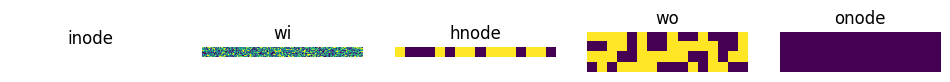

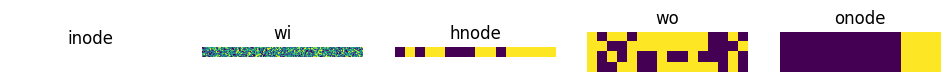

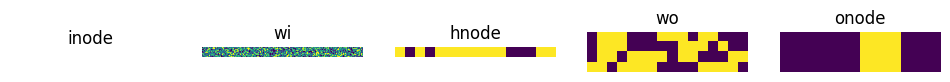

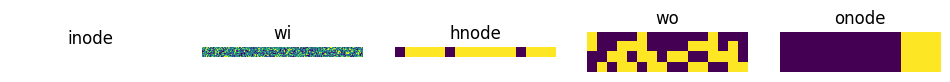

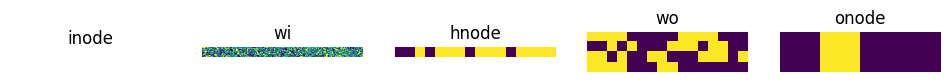

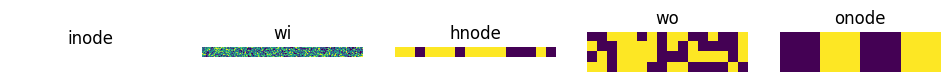

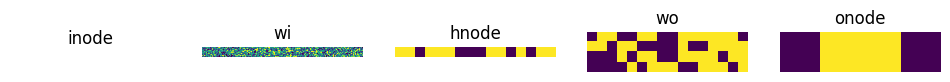

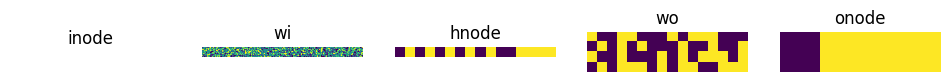

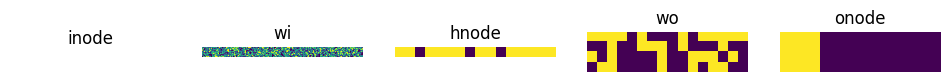

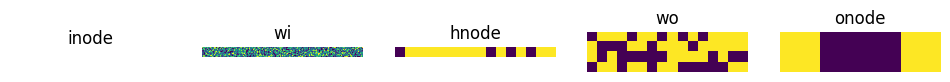

In [19]:
for i in range(0,10):
    #blnn_set[i].feedforward()
    show_nn(blnn_set[i])

C:\Users\user\AppData\Local\Temp\ipykernel_1696\2689927983.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axs=plt.subplots(nrows=1, ncols=1)


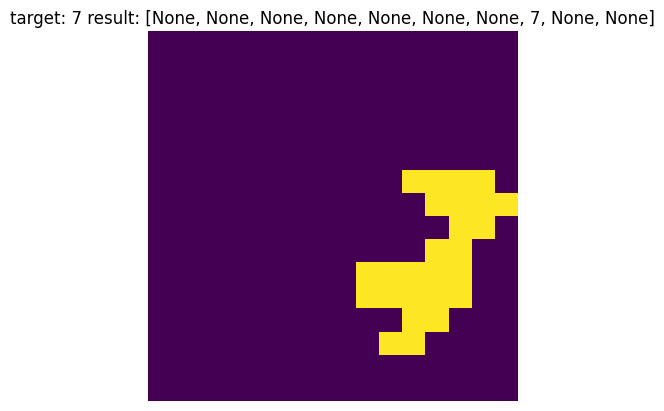

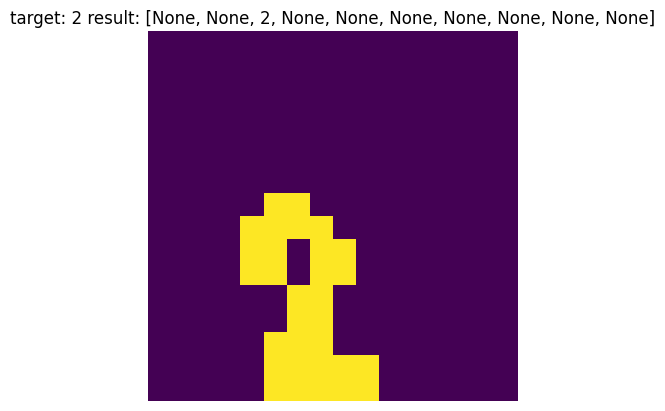

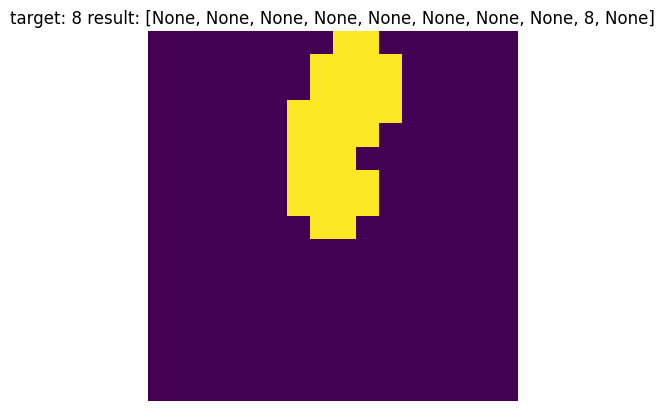

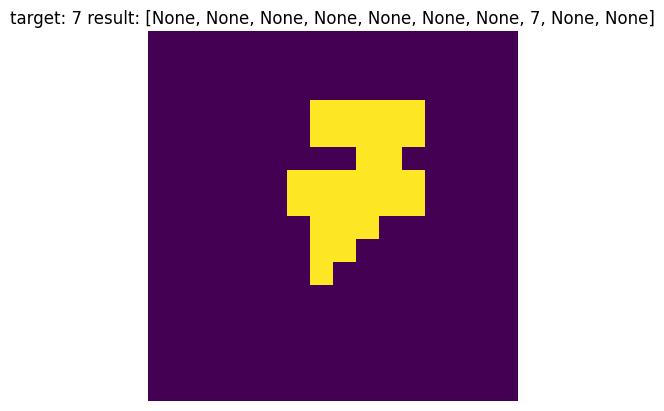

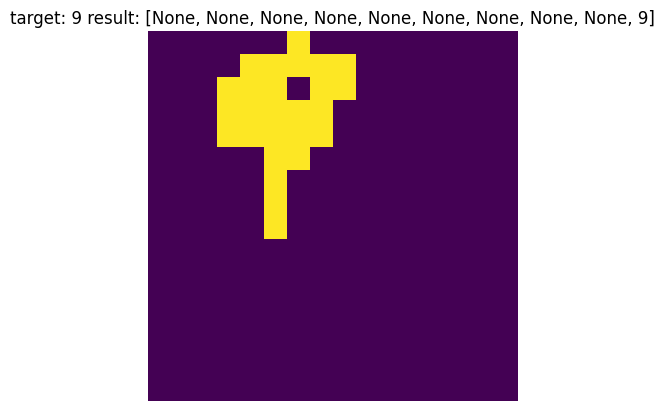

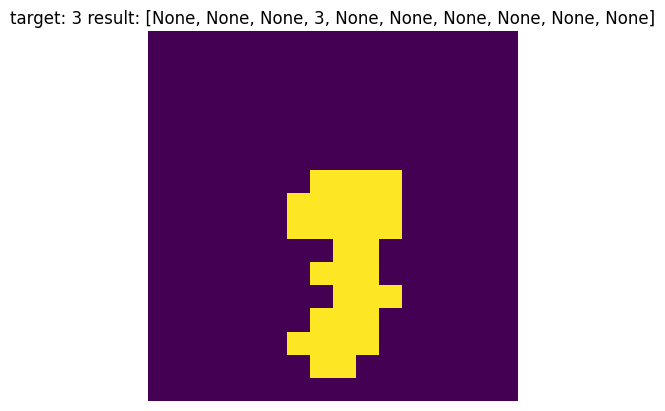

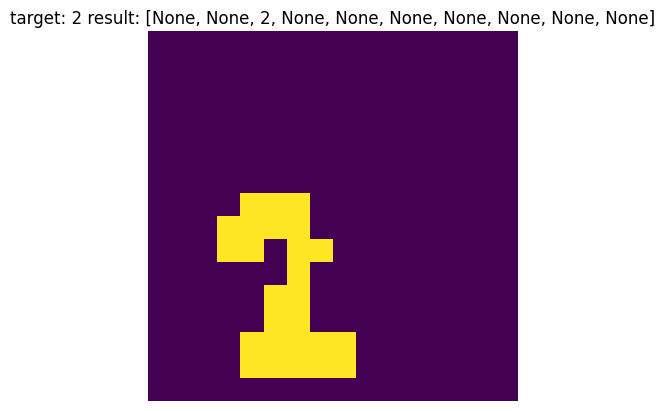

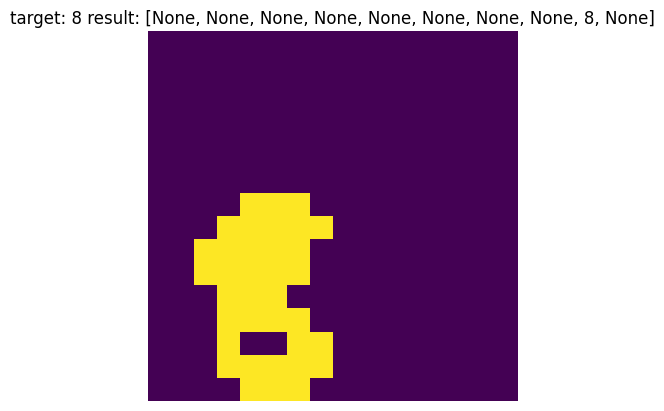

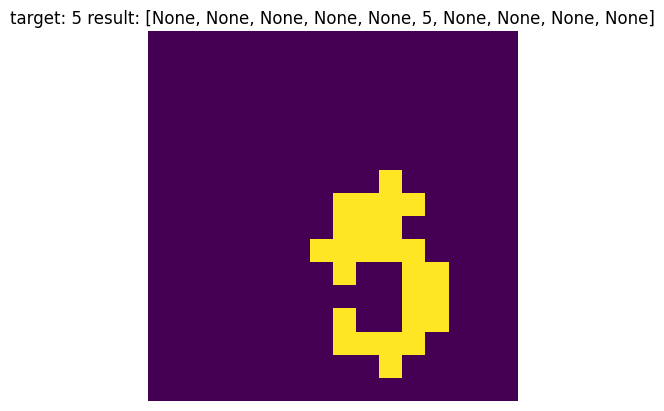

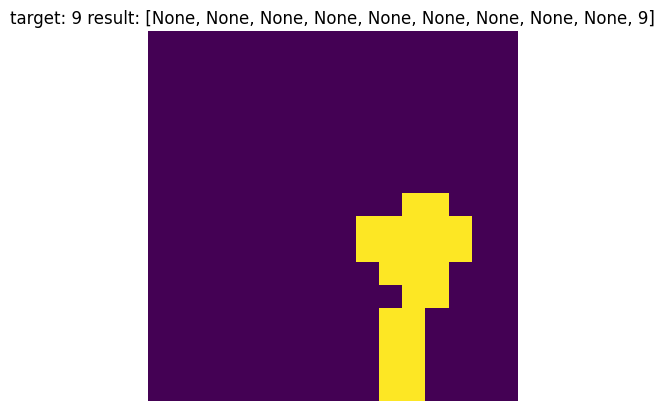

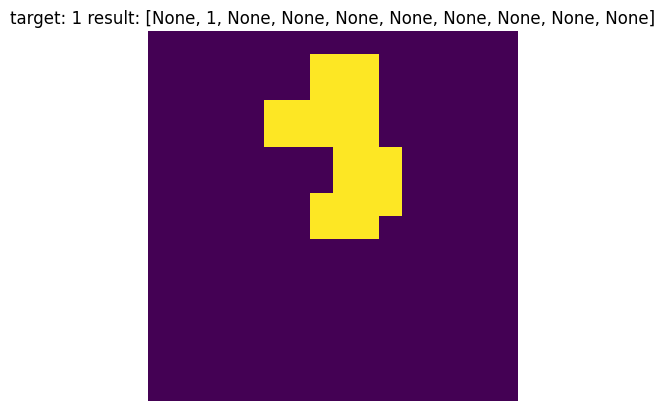

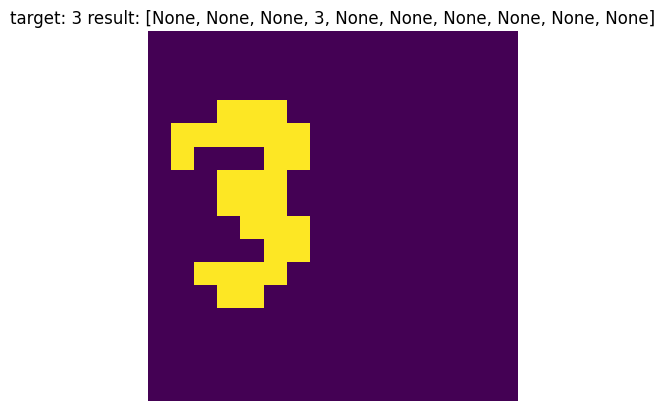

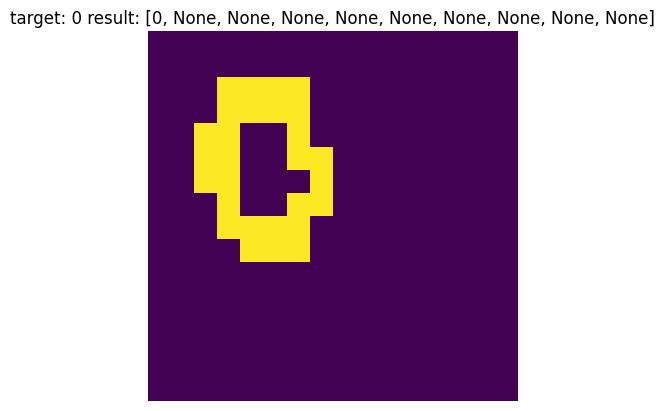

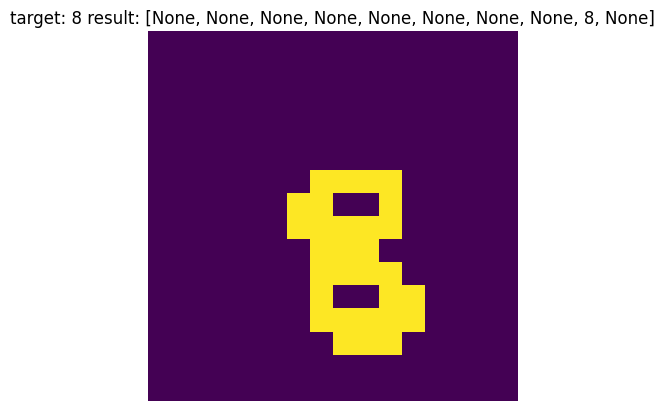

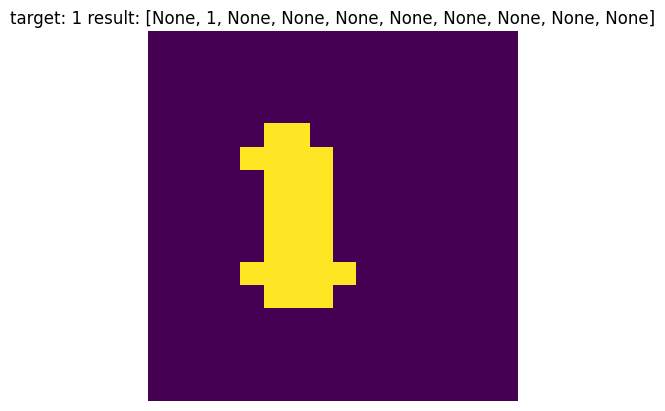

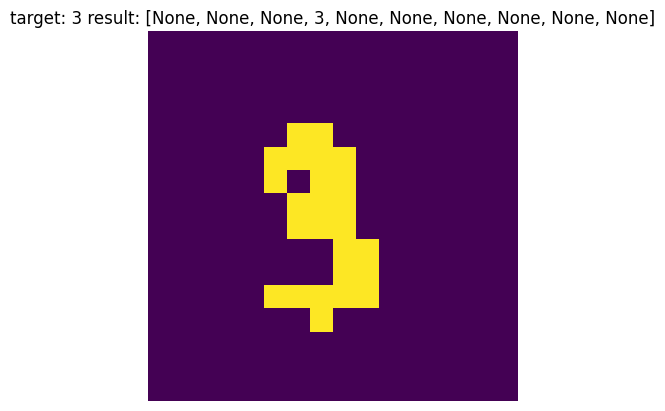

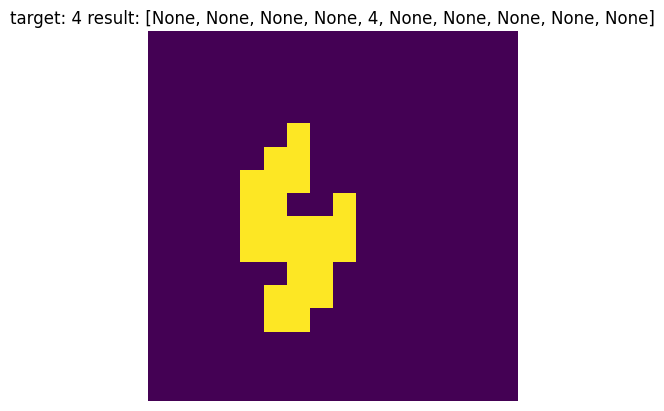

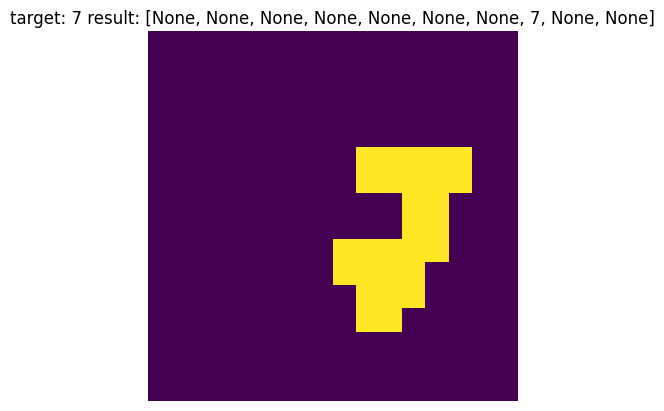

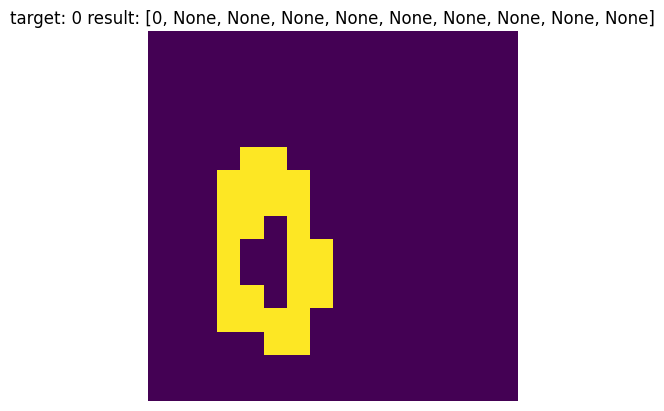

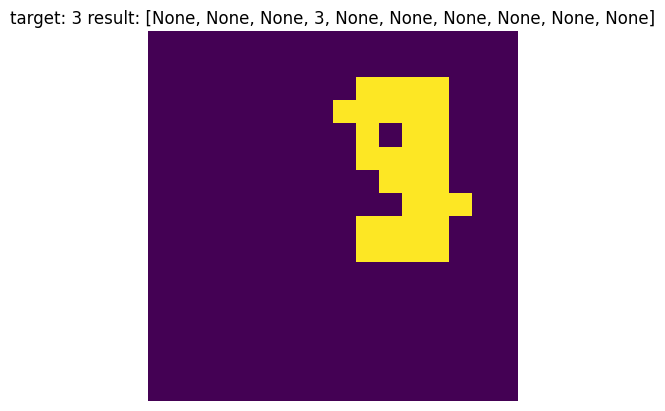

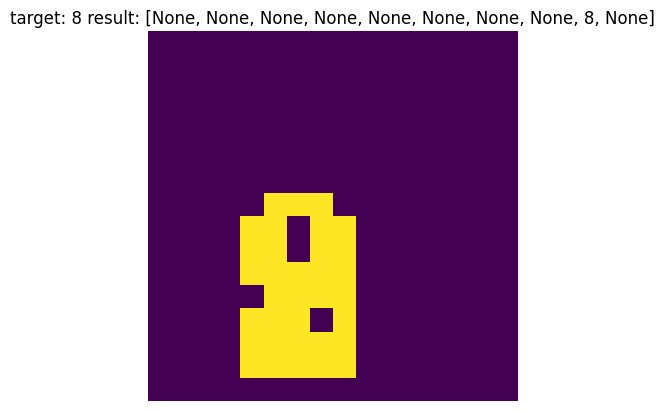

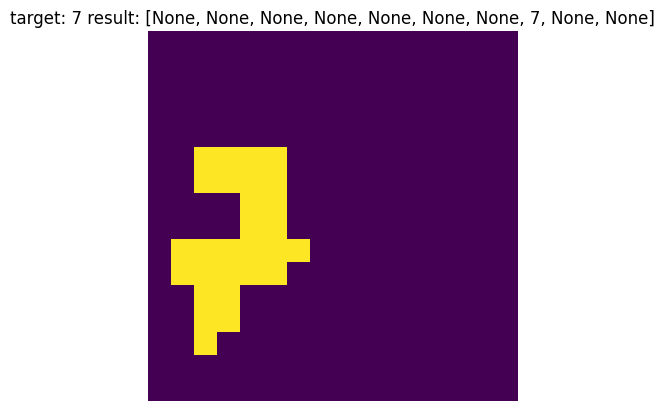

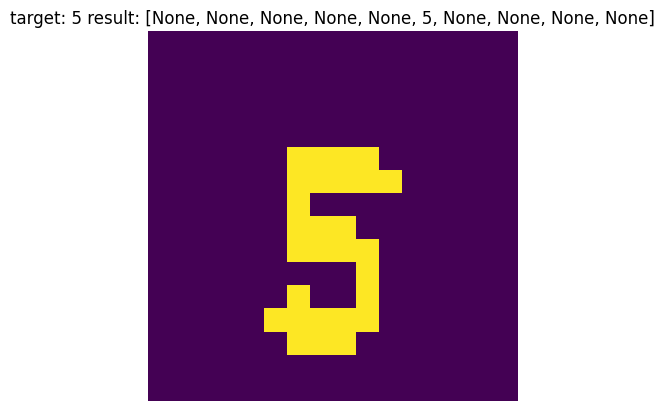

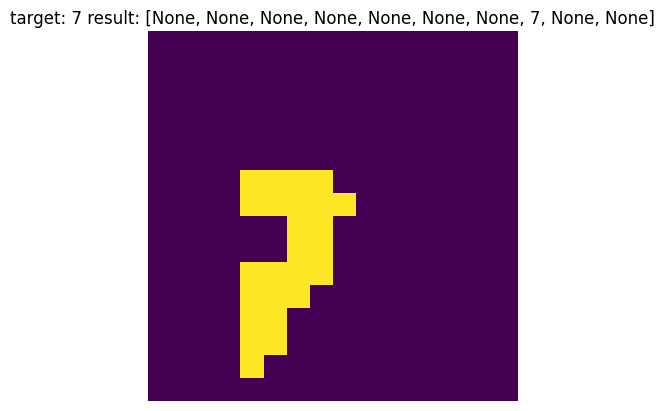

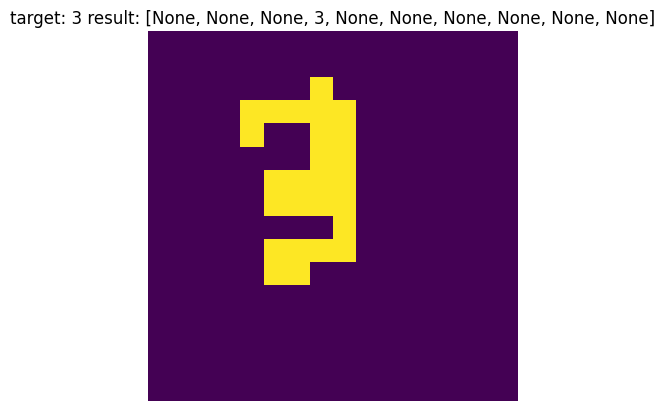

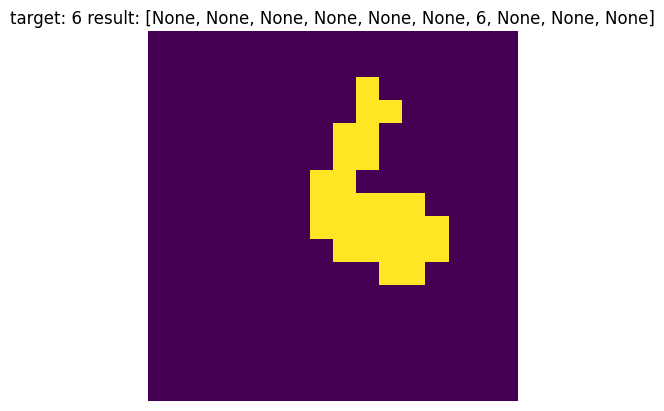

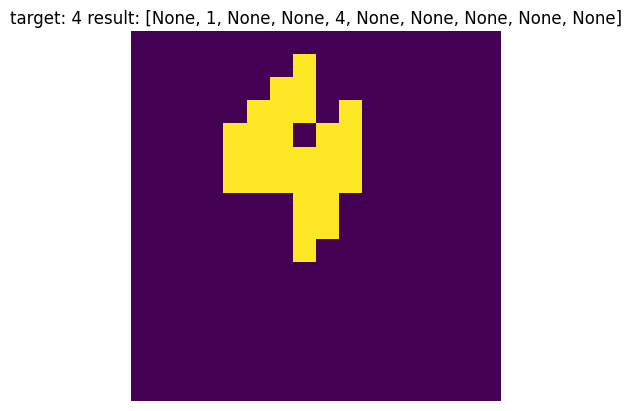

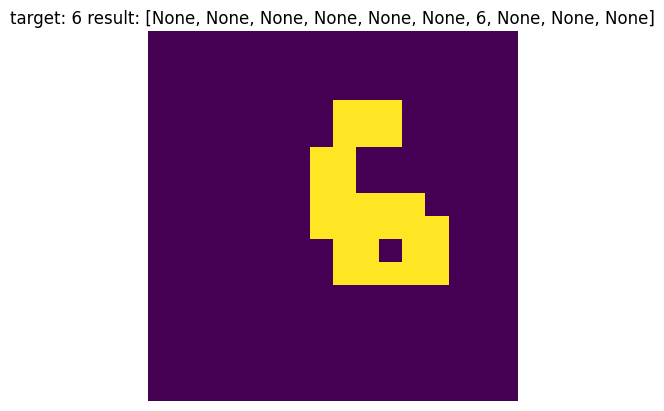

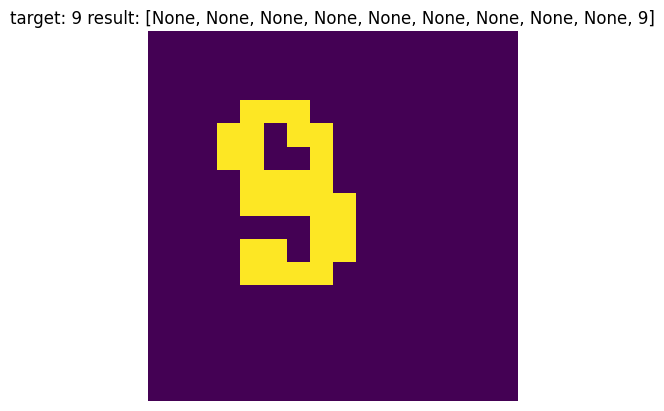

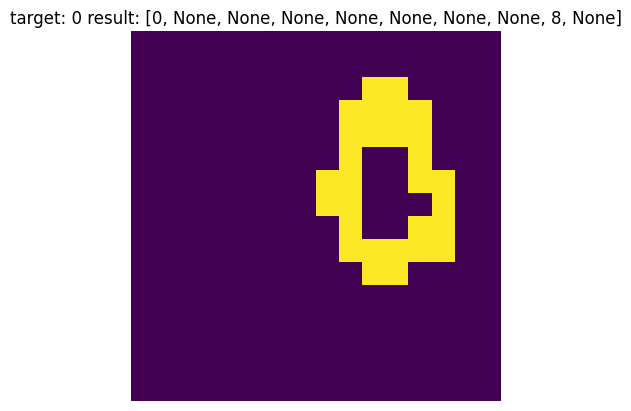

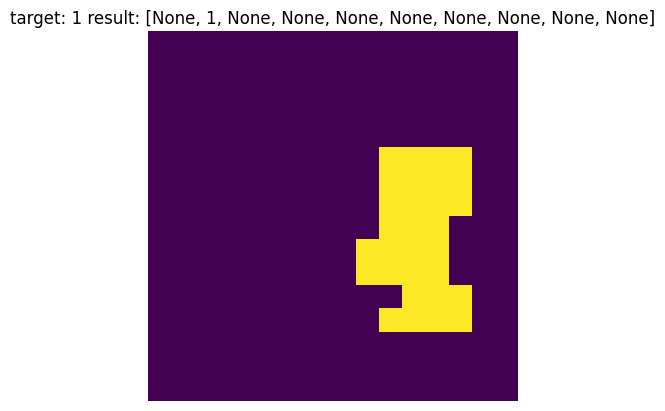

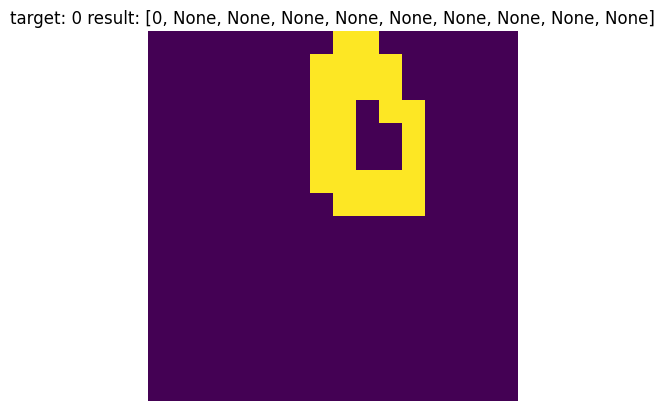

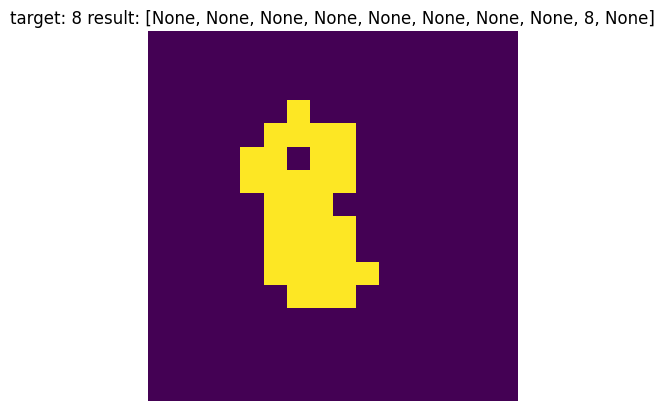

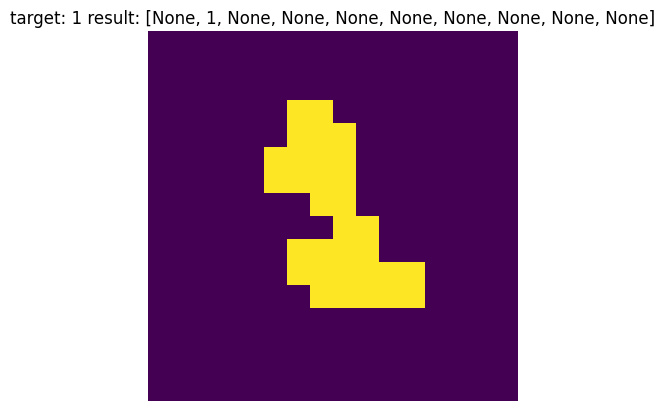

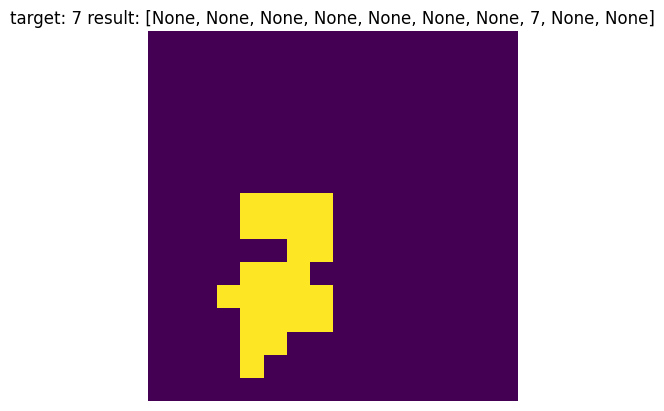

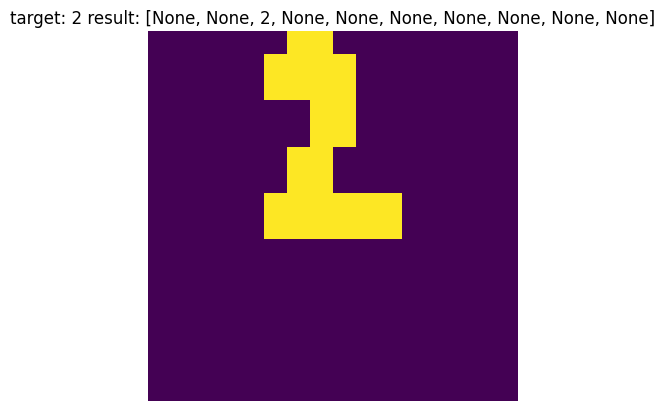

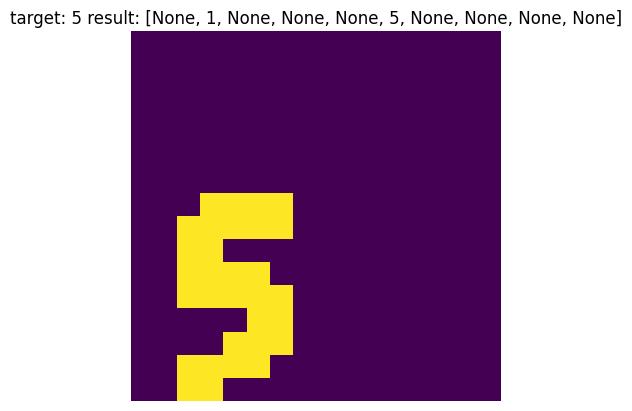

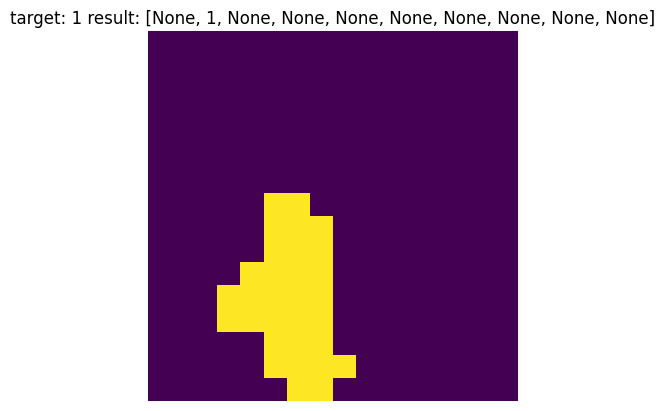

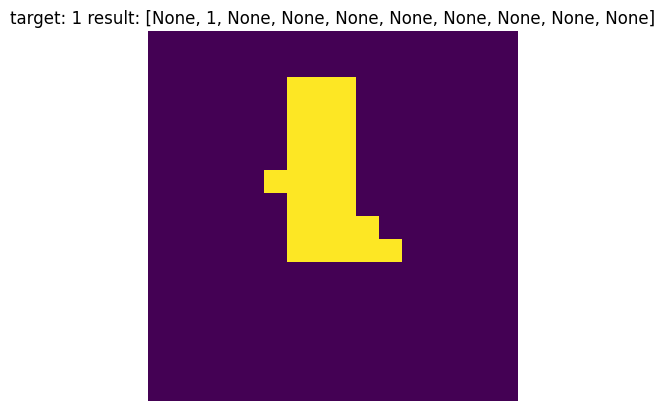

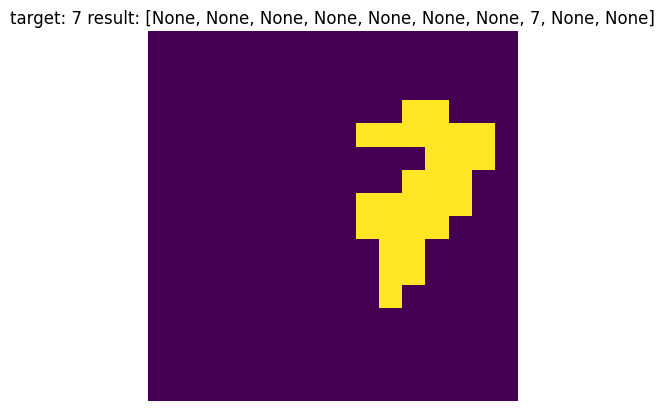

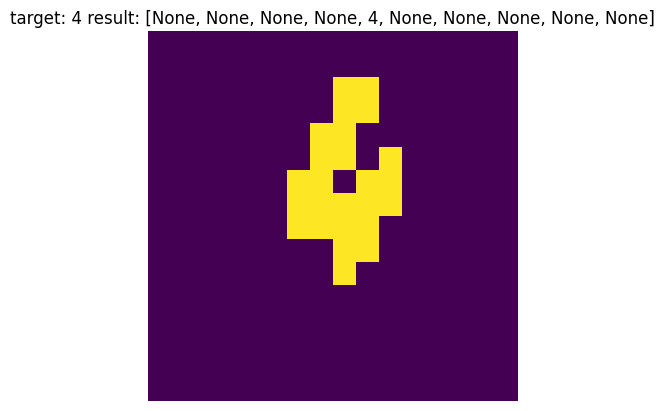

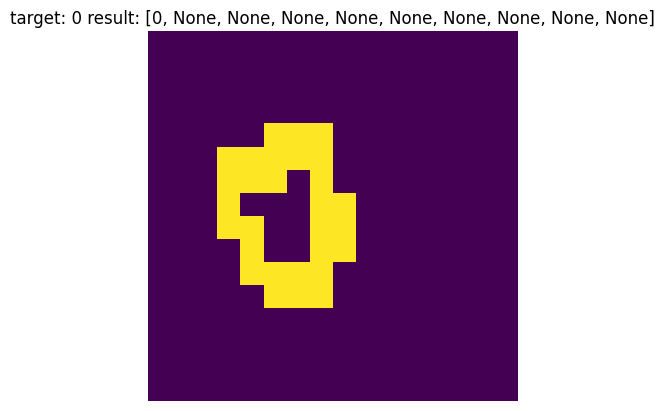

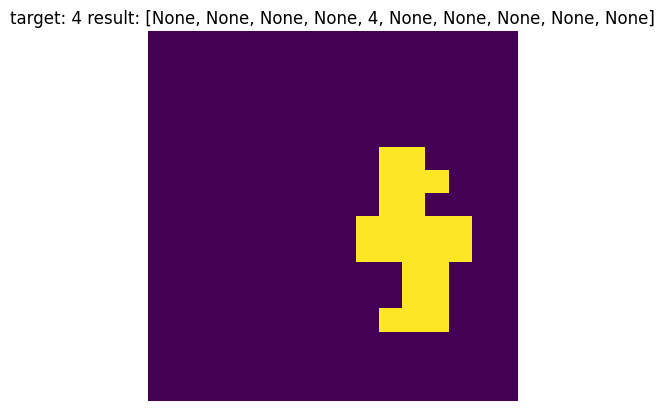

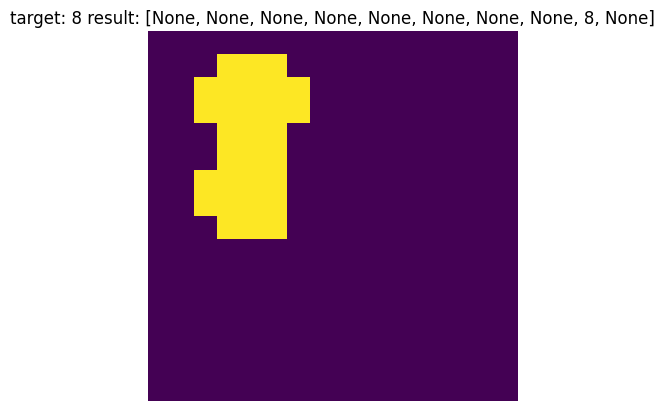

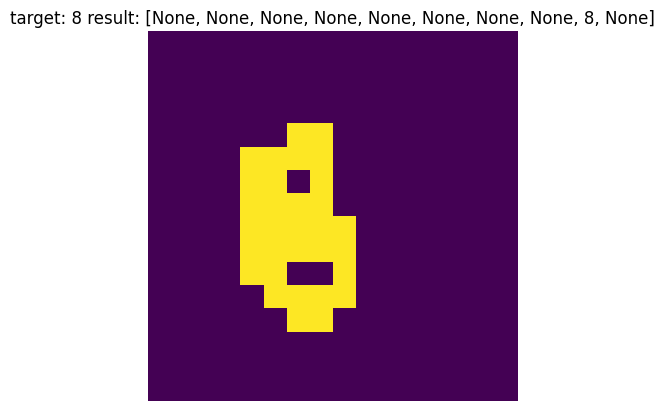

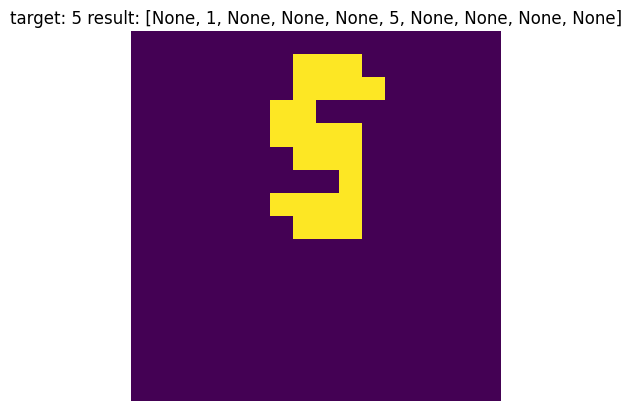

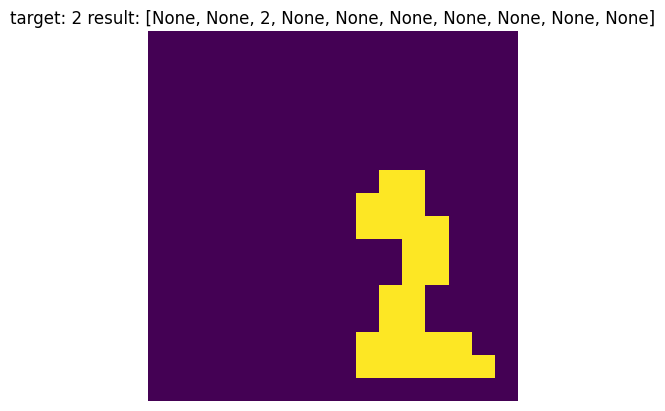

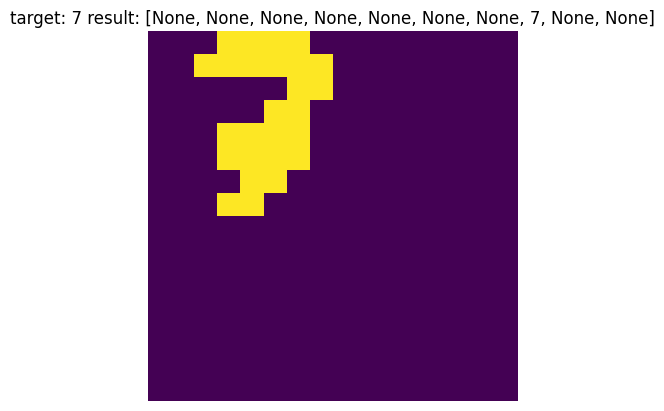

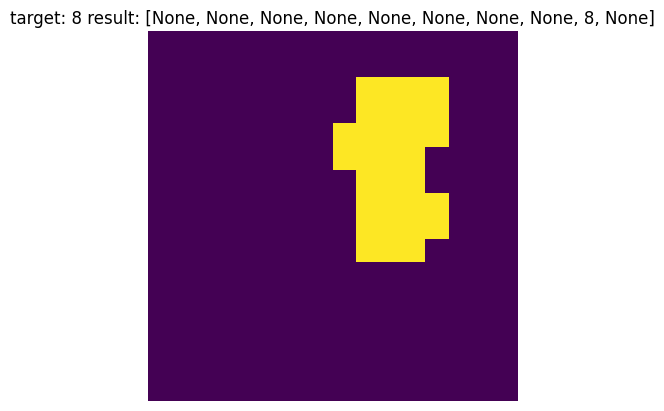

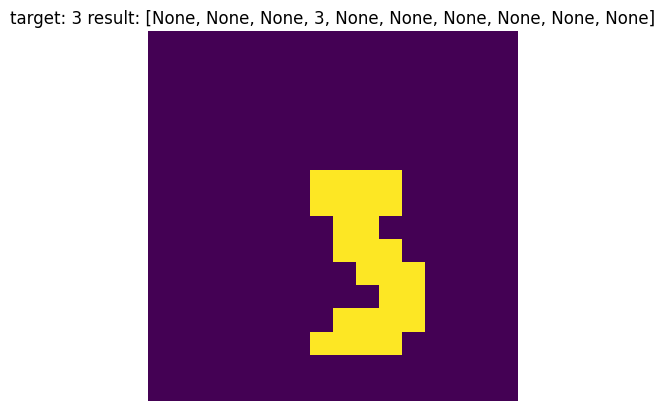

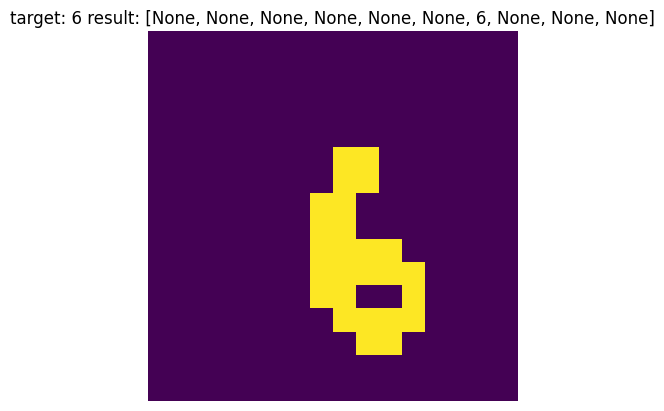

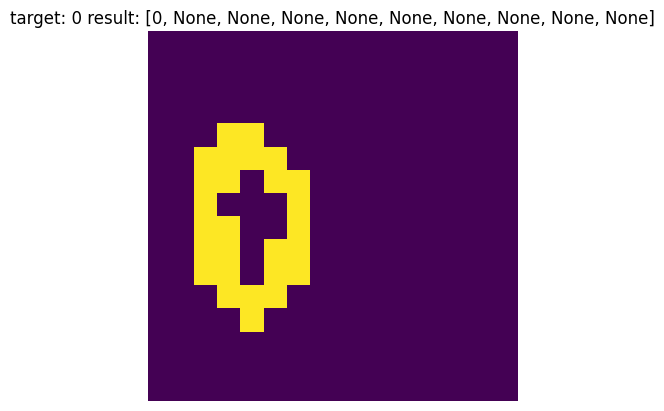

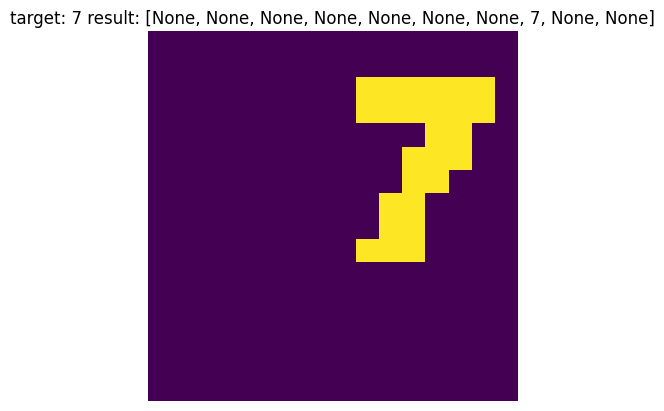

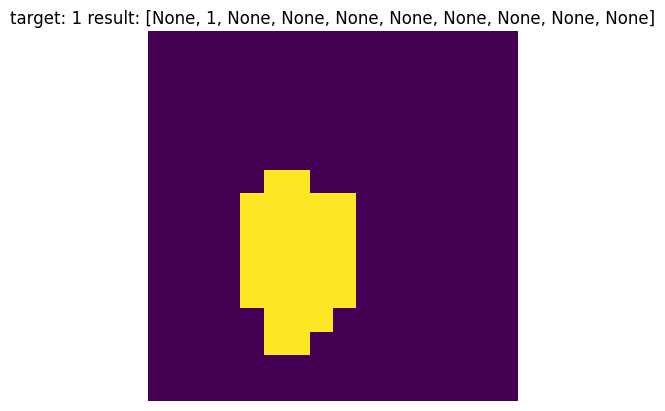

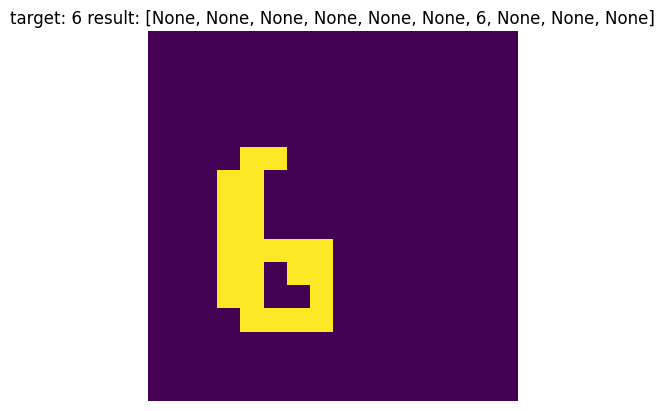

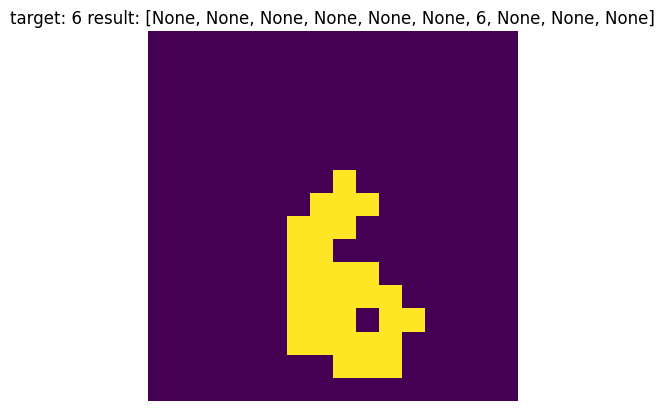

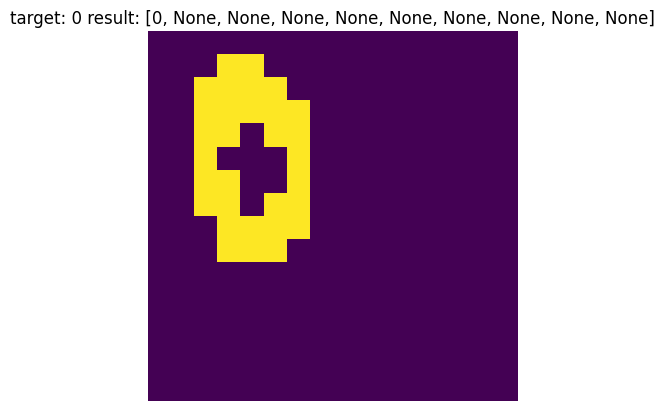

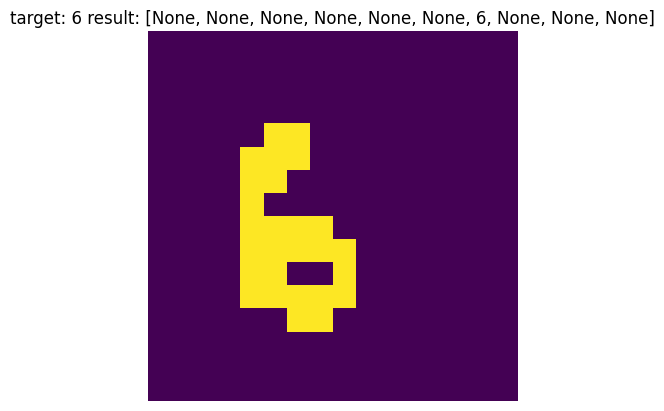

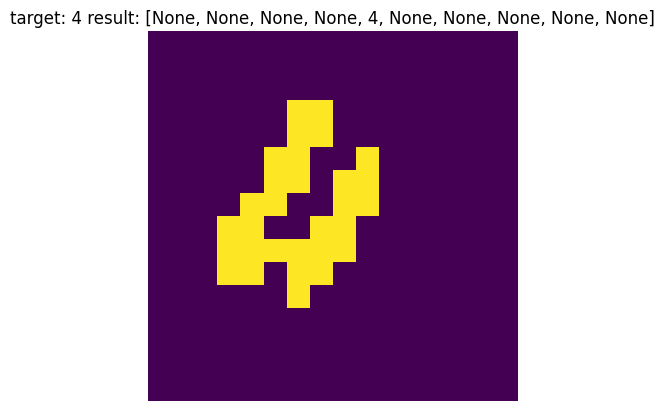

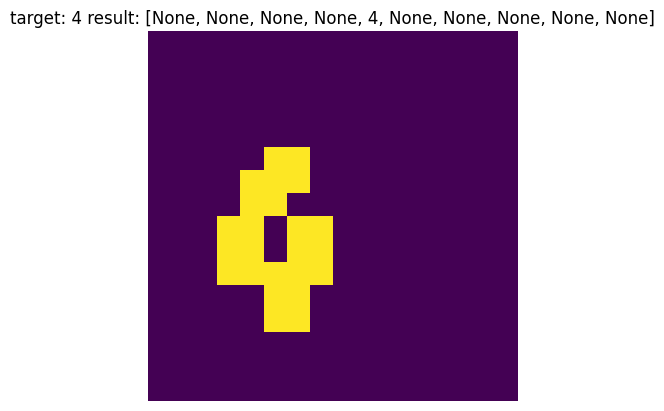

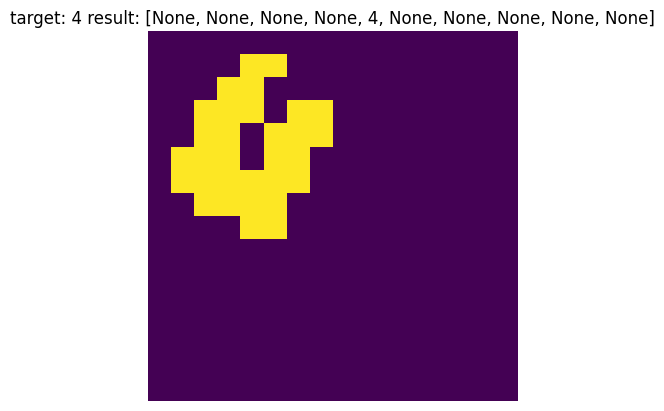

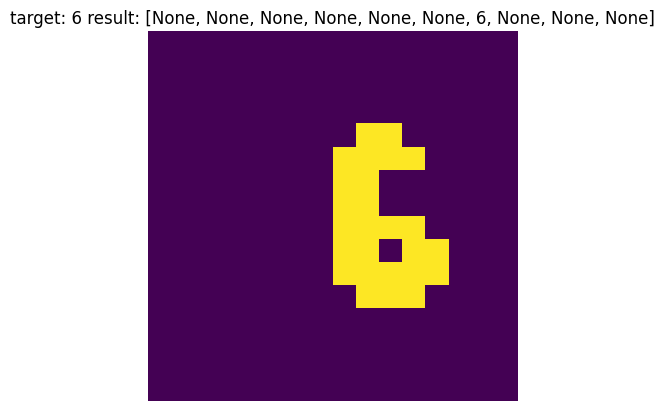

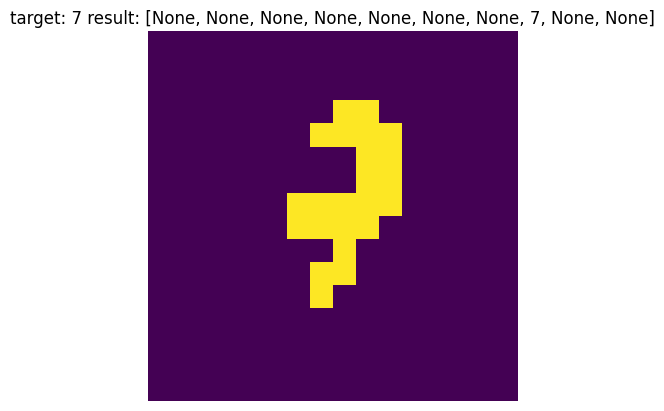

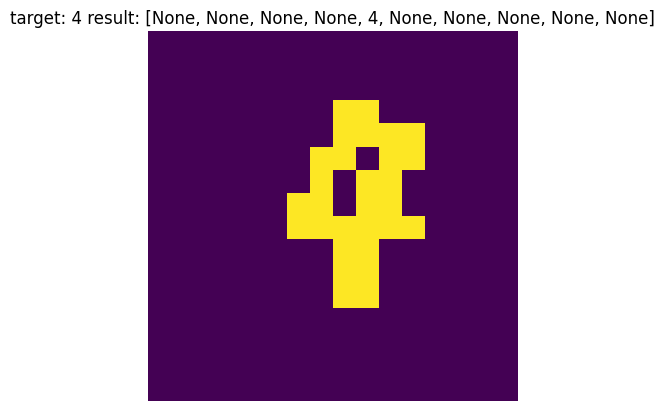

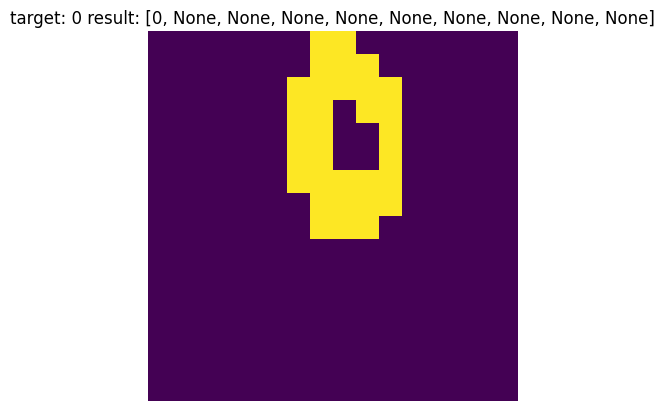

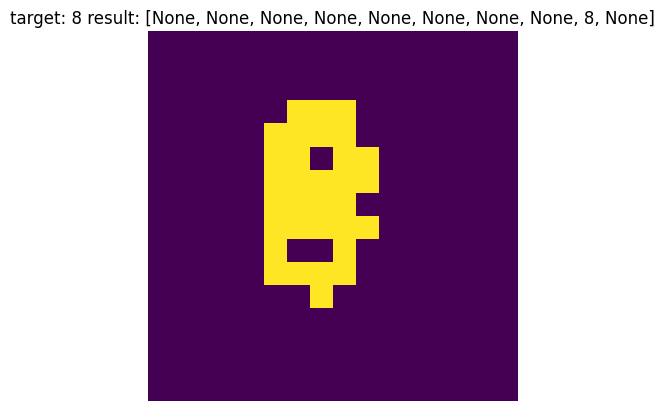

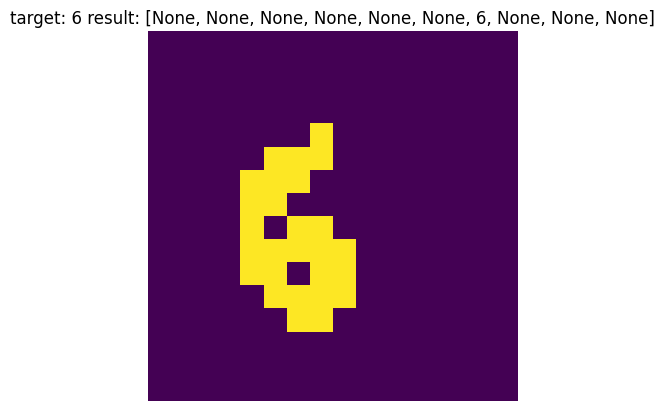

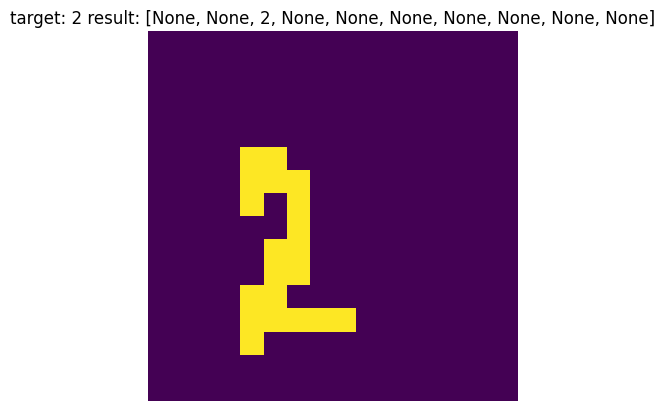

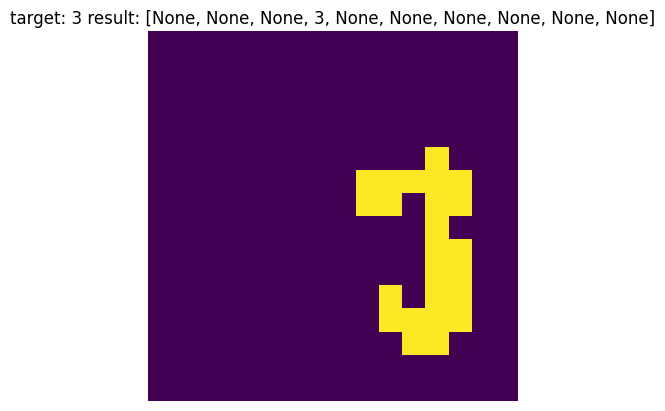

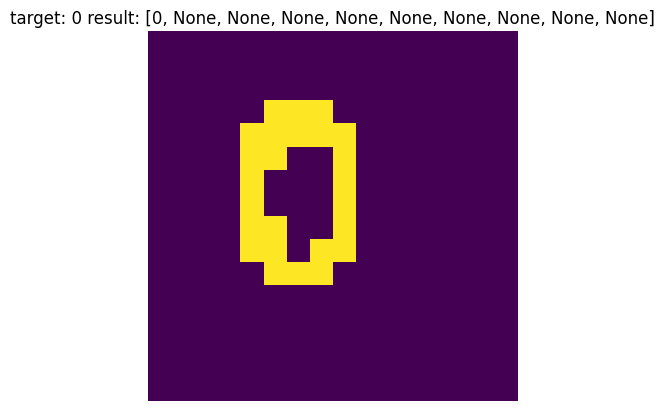

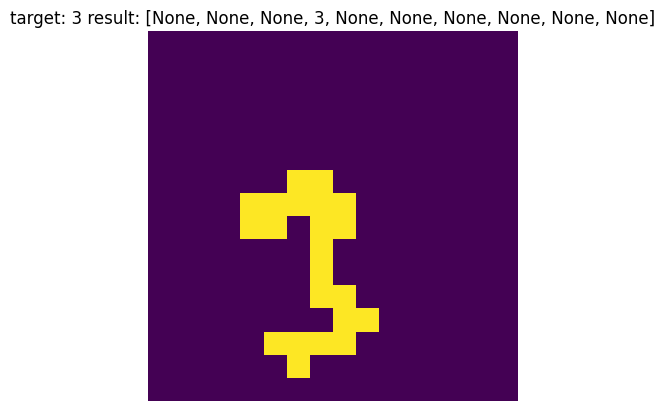

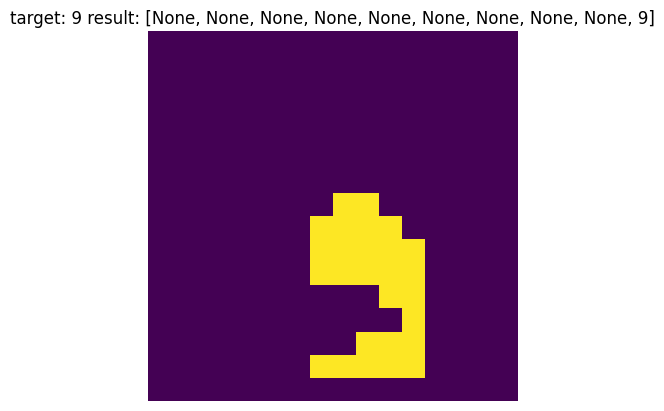

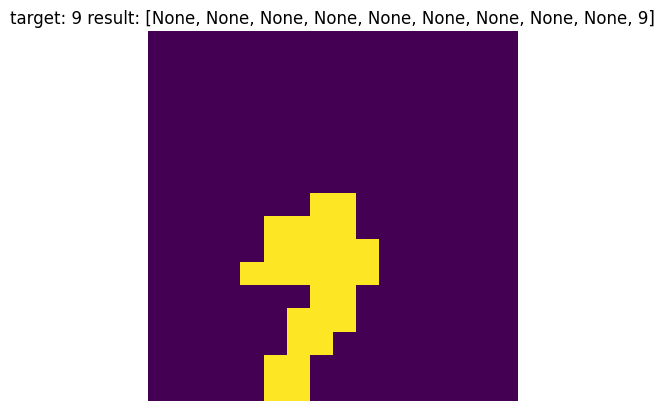

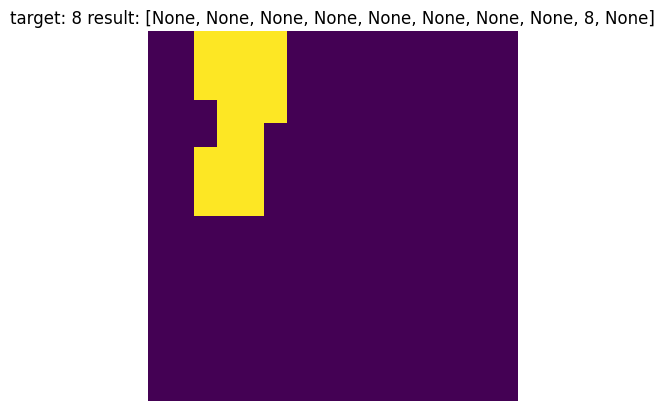

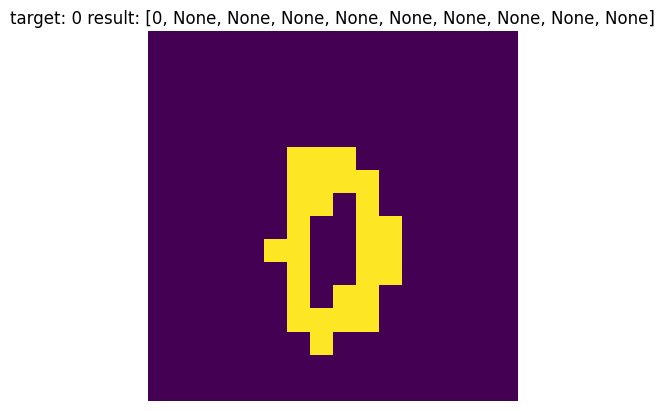

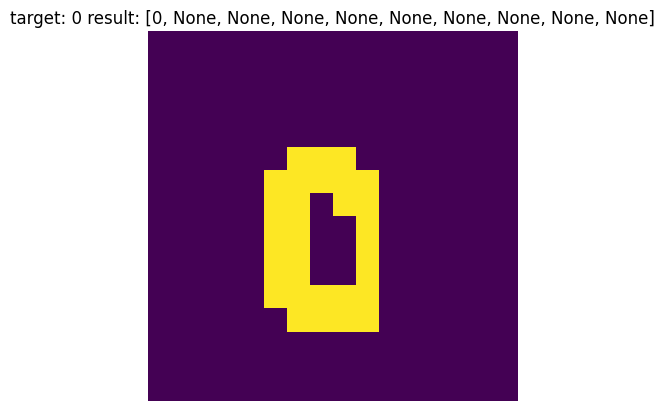

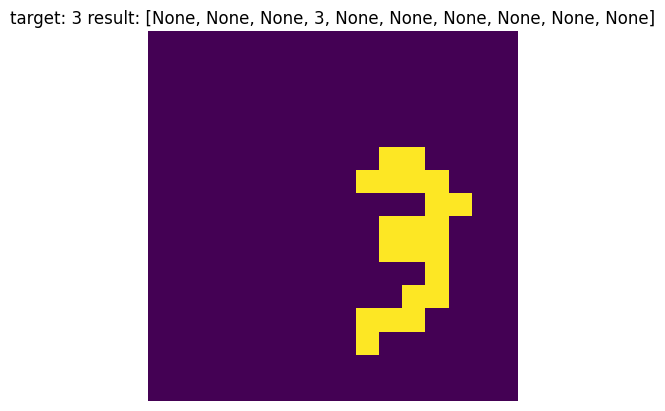

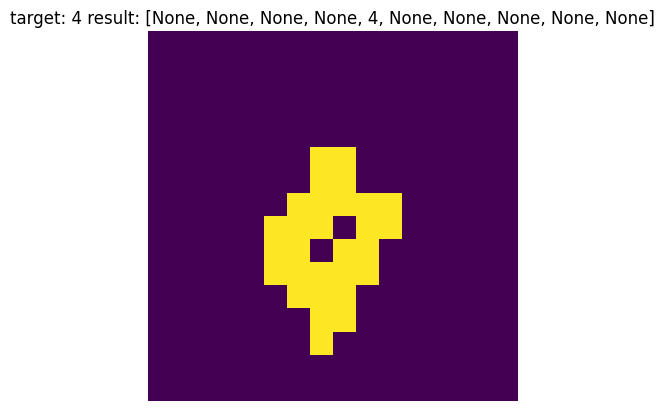

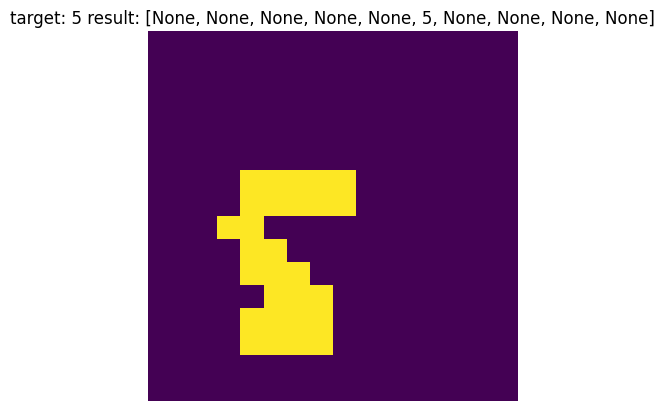

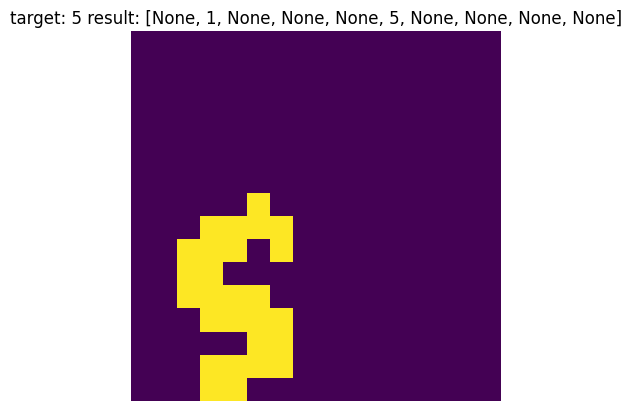

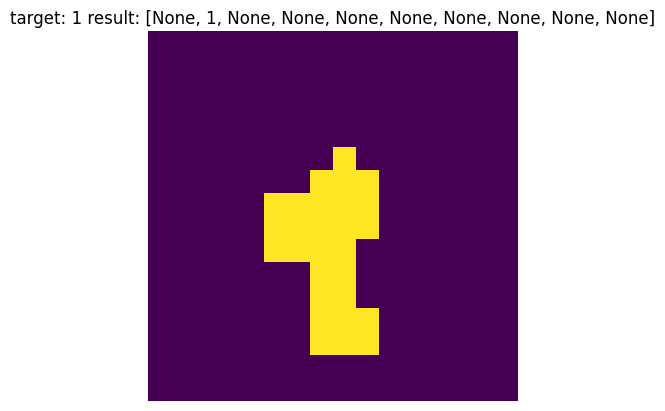

In [20]:
right=0
right_list=[]
for i in verify_set:

    inputs,targets,num=i
    temp=(np.array(inputs)).reshape(16,16)
    #show_nparray(temp)
    b=[verify(blnn,inputs,targets) for blnn in blnn_set]
    res=[if_num(x,y) for x,y in zip(b,num_list)]
    try:
        ind=res.index(num)
        right+=1
        #print('target:',num,'result:',res)
        title='target: '+str(num)+' result: '+str(res)
        show_nparray_title(temp,title)
        right_list.append(num)
    except:
        pass


In [21]:
    
print(right) 
print(right_list)


81
[7, 2, 8, 7, 9, 3, 2, 8, 5, 9, 1, 3, 0, 8, 1, 3, 4, 7, 0, 3, 8, 7, 5, 7, 3, 6, 4, 6, 9, 0, 1, 0, 8, 1, 7, 2, 5, 1, 1, 7, 4, 0, 4, 8, 8, 5, 2, 7, 8, 3, 6, 0, 7, 1, 6, 6, 0, 6, 4, 4, 4, 6, 7, 4, 0, 8, 6, 2, 3, 0, 3, 9, 9, 8, 0, 0, 3, 4, 5, 5, 1]


In [22]:
len(verify_set)

100

In [23]:
right/len(verify_set)

0.81